In [1]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Data Import and Overview

In [2]:
df = pd.read_parquet('yellow_tripdata_2025-01.parquet')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.0


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.trip_distance.max()

# Ride Duration Calculation

In [4]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [ ]:
df.head()

In [5]:
df['duration'] = df.duration.dt.total_seconds() / 60

In [ ]:
df.head()

In [ ]:
df.duration.mean()

In [ ]:
df.duration.std()

In [ ]:
df.duration.max()

In [ ]:
df.duration.min()

In [ ]:
df.describe()

## Removing Outliers 

In [8]:
len(df[(df.duration >= 1) & (df.duration <= 60)]) / len(df) * 100

100.0

In [7]:
df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

In [ ]:
df.duration.std()

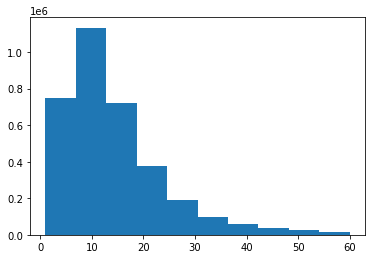

In [9]:
plt.hist(df.duration)
plt.show()

In [ ]:
df.duration.max()

# One-hot Encoding

In [10]:
categorical = ['PULocationID', 'DOLocationID']

In [11]:
df[categorical] = df[categorical].astype(str)

In [ ]:
df.info()

In [12]:
train_dicts = df[categorical].to_dict(orient='records')

In [ ]:
train_dicts

In [13]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [ ]:
X_train

In [14]:
print(f'Feature matrix size: {X_train.shape}')

Feature matrix size: (3403248, 519)


# Training a Model

In [15]:
target = 'duration'
y_train = df[target].values

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

print(f'Train RMSE: {mean_squared_error(y_train, y_pred, squared=False)}')

Train RMSE: 7.707821029851613


In [18]:
lr.coef_

array([ 1.86355461e+01, -1.98032489e+01, -3.13941072e+00, -6.31270463e+00,
       -2.81164011e+00, -6.57896141e+00,  6.43828221e+00, -5.06500561e+00,
        2.59193379e+00,  2.47384985e+01,  4.02794991e+00,  1.11823096e+00,
        1.36550671e+00, -3.98667248e+00, -3.59821596e+00,  1.13055196e+01,
        2.14101688e+00,  1.46584625e-01,  1.47691783e+01,  1.48938456e+00,
        1.82445843e+00,  4.19272676e+00, -4.90081981e+00, -7.58513199e+00,
        1.56472971e+00, -1.37504382e+01, -2.79697656e+00,  5.98595221e-01,
        4.67117454e+00,  6.04115035e+00, -2.03932513e+00,  3.58565054e-01,
       -1.10008305e+01, -6.72242153e+00,  1.61839379e+01,  5.65946618e+00,
       -7.70441416e+00, -8.74807324e+00,  8.09525276e+00, -4.95259101e+00,
        8.31546175e+00, -1.39370350e+01,  6.77608652e+00, -3.11105368e+00,
       -4.85136441e+00, -4.27104528e+00, -3.60768830e+00, -1.84797566e+00,
       -2.39964156e+00, -1.86761948e+00,  3.09845170e+00, -1.83377765e+00,
        1.43225906e+00, -

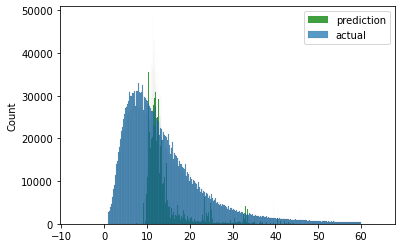

In [17]:
sns.histplot(y_pred, label='prediction', color='green')
sns.histplot(y_train, label='actual')

plt.legend();

# Evaluating the model

In [19]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].astype('str')
    
    return df

In [ ]:
df_val = read_data('yellow_tripdata_2025-07.parquet')

In [ ]:
val_dicts = df_val[categorical].to_dict(orient='records')

In [ ]:
X_val = dv.fit_transform(val_dicts) 
y_val = df_val.duration.values

In [ ]:
y_pred = lr.predict(X_val)

In [ ]:
print(f'Val RMSE: {mean_squared_error(y_val, y_pred, squared=False)}')